# Problem Statement 
Patients with Liver disease have been continuously increasing because of excessive 
consumption of alcohol, inhale of harmful gases, intake of contaminated food, 
pickles and drugs. This dataset was used to evaluate prediction algorithms in an 
effort to reduce burden on doctors.


# Details

This data set contains 583 liver patient records and 167 non liver patient records 
collected from North East of Andhra Pradesh, India. The "Dataset" column is a class 
label used to divide groups into liver patient (liver disease) or not (no disease). This 
data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".

#### Columns:

• Age of the patient
• Gender of the patient
• Total Bilirubin
• Direct Bilirubin
• Alkaline Phosphotase
• Alamine Aminotransferase
• Aspartate Aminotransferase
• Total Protiens
• Albumin
• Albumin and Globulin Ratio
• Dataset: field used to split the data into two sets (patient with liver disease, or 
no disease)


# Objective:

The primary goal is to visualize the data and establish trends or important 
characteristics, if any. The next important objective is to create a pycaret model that 
can predict the class of the patient by the virtue of its input.



In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# pycaret library

In [2]:
!pip install pycaret

     -------------------------------------- 484.4/484.4 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 153.4/153.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 572.7/572.7 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 81.8/81.8 kB ? eta 0:00:00
     -------------------------------------- 106.8/106.8 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 6.9 MB/s eta 0:00:00
     --------------------------------------- 17.5/17.5 MB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 73.4/73.4 kB 3.9 MB/s eta 0:00:00
     ----------------------

In [3]:
import pycaret

In [5]:
from pycaret.datasets import get_data
dataset = pd.read_csv('indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
dataset.shape

(583, 11)

In [7]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
# splitting the data into training and test
# training data
data = dataset.sample(frac=0.90, random_state=1).reset_index(drop=True)
# test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [10]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
520,45,Male,1.7,0.8,315,12,38,6.3,2.1,0.5,1
521,50,Male,4.2,2.3,450,69,50,7.0,3.0,0.7,1
522,50,Female,1.0,0.5,239,16,39,7.5,3.7,0.9,1
523,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1
524,45,Female,0.7,0.2,153,41,42,4.5,2.2,0.9,2


In [11]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

In [14]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=1)


In [15]:
print("Data for Modeling :" + str(data.shape))
print("###########"*10)
print("Unseen Data for Prediction :" + str(data_unseen.shape))

Data for Modeling :(525, 11)
##############################################################################################################
Unseen Data for Prediction :(58, 11)


In [16]:
!pip install numba==0.53

     ---------------------------------------- 2.3/2.3 MB 3.5 MB/s eta 0:00:00
     --------------------------------------- 16.0/16.0 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [17]:
from pycaret.classification import *

In [18]:
exp_clf101 = setup(data=data, target='Dataset' , session_id=123)

,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(525, 11)"
5,Transformed data shape,"(525, 11)"
6,Transformed train set shape,"(367, 11)"
7,Transformed test set shape,"(158, 11)"
8,Numeric features,10
9,Preprocess,True


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7410,0.7851,0.3809,0.5275,0.4337,0.2832,0.2894,0.1680
lightgbm,Light Gradient Boosting Machine,0.7303,0.7578,0.4555,0.5182,0.4702,0.2974,0.3042,0.1060
rf,Random Forest Classifier,0.7274,0.7680,0.3091,0.5242,0.3836,0.2258,0.2407,0.1730
gbc,Gradient Boosting Classifier,0.7224,0.7371,0.3882,0.5116,0.4341,0.2589,0.2655,0.1080
dummy,Dummy Classifier,0.7194,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0490
xgboost,Extreme Gradient Boosting,0.7140,0.7486,0.4073,0.4858,0.4328,0.2493,0.2544,0.0660
ridge,Ridge Classifier,0.7139,0.0000,0.0000,0.0000,0.0000,-0.0105,-0.0213,0.0210
lr,Logistic Regression,0.7112,0.7348,0.1755,0.4683,0.2487,0.1163,0.1394,0.8510
lda,Linear Discriminant Analysis,0.7057,0.7125,0.0200,0.1000,0.0333,-0.0085,-0.0207,0.0410
svm,SVM - Linear Kernel,0.7029,0.0000,0.1273,0.1917,0.1428,0.0562,0.0532,0.0220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [33]:
# ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
#                      criterion='gini', max_depth=None, max_features='auto',
#                      max_leaf_nodes=None, max_samples=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
#                      oob_score=False, random_state=123, verbose=0,
#                      warm_start=False)

In [21]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7027,0.6667,0.1000,0.3333,0.1538,0.0333,0.0422
1,0.7838,0.7889,0.4000,0.6667,0.5000,0.3729,0.3927
2,0.7027,0.6741,0.1000,0.3333,0.1538,0.0333,0.0422
3,0.6486,0.5444,0.1000,0.2000,0.1333,-0.0571,-0.0625
4,0.7568,0.8427,0.1818,1.0000,0.3077,0.2380,0.3675
5,0.6216,0.7622,0.0000,0.0000,0.0000,-0.1460,-0.1932
6,0.7568,0.8916,0.2727,0.7500,0.4000,0.2869,0.3448
7,0.6944,0.7269,0.2000,0.4000,0.2667,0.1000,0.1096
8,0.7222,0.7038,0.2000,0.5000,0.2857,0.1509,0.1754


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7568,0.7963,0.3000,0.6000,0.4000,0.2681,0.2935
1,0.8378,0.8981,0.7000,0.7000,0.7000,0.5889,0.5889
2,0.6486,0.7093,0.3000,0.3333,0.3158,0.0803,0.0805
3,0.7297,0.7444,0.5000,0.5000,0.5000,0.3148,0.3148
4,0.7838,0.8304,0.3636,0.8000,0.5000,0.3859,0.4348
5,0.8378,0.8741,0.5455,0.8571,0.6667,0.5664,0.5917
6,0.6486,0.7640,0.0000,0.0000,0.0000,-0.1007,-0.1555
7,0.7222,0.7481,0.3000,0.5000,0.3750,0.2105,0.2219
8,0.6944,0.6827,0.3000,0.4286,0.3529,0.1610,0.1654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



In [24]:
x_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
67,13,0,0.7,0.1,182,24,19,8.9,4.9,1.20
469,70,1,0.6,0.1,862,76,180,6.3,2.7,0.75
484,58,1,0.9,0.2,1100,25,36,7.1,3.5,0.90
464,42,1,0.7,0.2,197,64,33,5.8,2.4,0.70
289,30,1,1.6,0.4,332,84,139,5.6,2.7,0.90


In [25]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("#########"*10)
print("Test Accuracy : ", accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.7330508474576272
##########################################################################################
Test Accuracy :  0.7735849056603774


In [29]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lr_model, x_train, y_train, cv=10)
test_accuracy = cross_val_score(lr_model, x_test, y_test, cv=10)
print(training_accuracy.mean())
print("############"*10)
print(test_accuracy.mean())

0.7247783687943262
########################################################################################################################
0.74


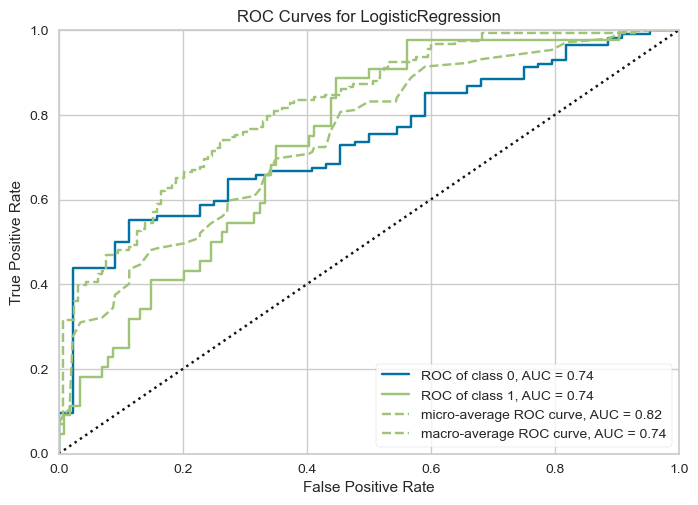

In [30]:
plot_model(lr, plot='auc')

In [31]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.6704,0.1000,0.5000,0.1667,0.0842,0.1237
1,0.7297,0.7556,0.2000,0.5000,0.2857,0.1553,0.1801
2,0.7297,0.6963,0.2000,0.5000,0.2857,0.1553,0.1801
3,0.6486,0.5444,0.1000,0.2000,0.1333,-0.0571,-0.0625
4,0.7568,0.8636,0.1818,1.0000,0.3077,0.2380,0.3675
5,0.6216,0.7797,0.0000,0.0000,0.0000,-0.1460,-0.1932
6,0.7568,0.9126,0.2727,0.7500,0.4000,0.2869,0.3448
7,0.6944,0.7231,0.1000,0.3333,0.1538,0.0294,0.0374
8,0.6667,0.6962,0.0000,0.0000,0.0000,-0.1020,-0.1504


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7222,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7222,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


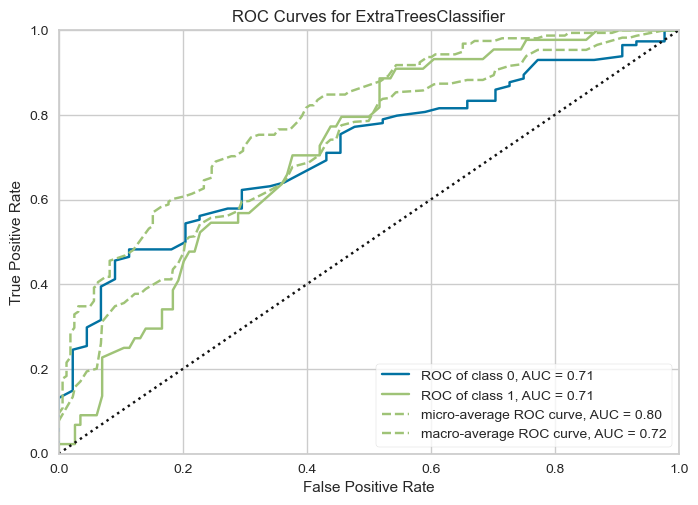

In [34]:
plot_model(et, plot='auc')

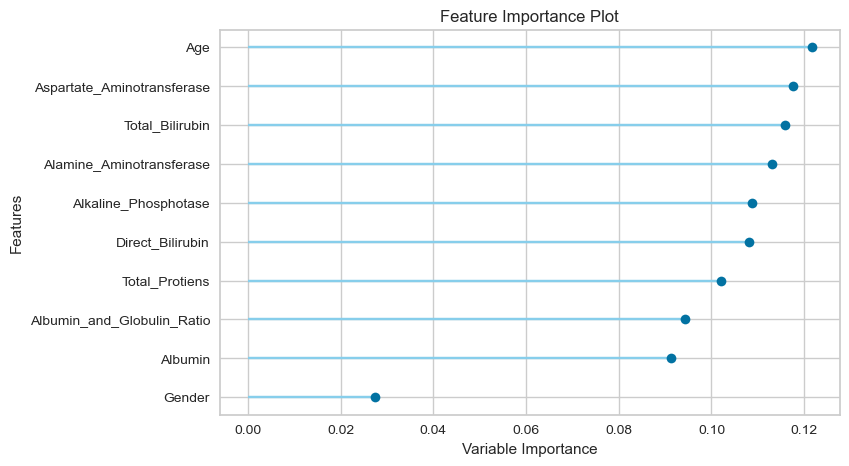

In [35]:
# which feature is more significant
plot_model(tuned_et, plot='feature')

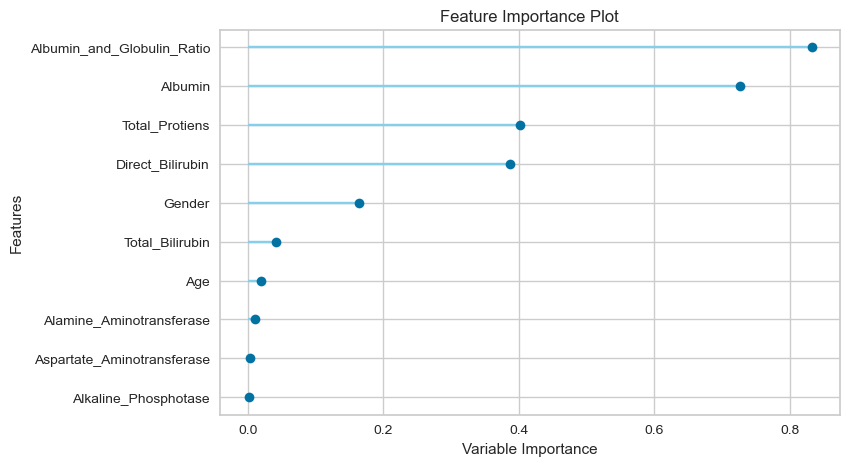

In [36]:
plot_model(tuned_lr, plot='feature')

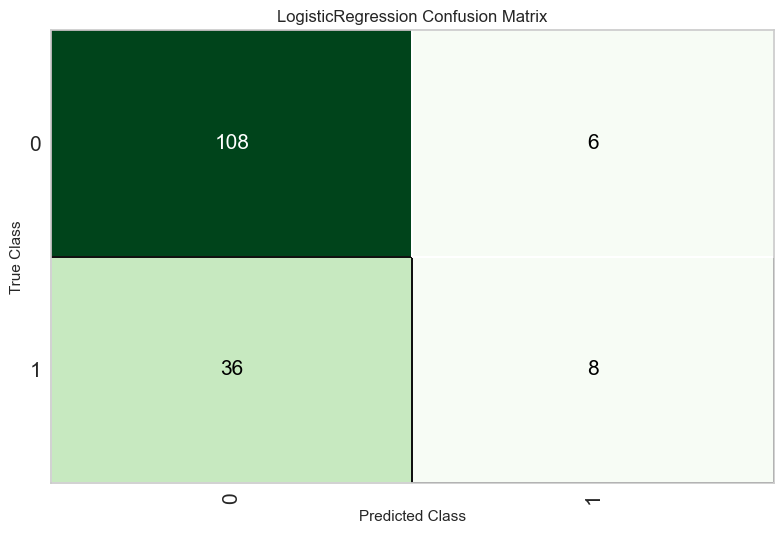

In [37]:
plot_model(tuned_lr, plot='confusion_matrix')

In [38]:
# Evaluate the model
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
# Test data - unseen data
unseen_prediction = predict_model(tuned_lr, data=data_unseen)
unseen_prediction.head()

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Female'

In [40]:
save_model(tuned_lr, 'tuned_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\atkumar\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransfera...
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                     